In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Cleaned_Food_Order2.csv")
df.head()

,Customer ID,Restaurant Name,Cuisine Type,Cost of the order,Day of the week,Rating,Food preparing time,Delivery time,Total time
0,337525,Hangawi,Korean,30.75,Weekend,4,25,20,45
1,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,4,25,23,48
2,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51
3,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40
4,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49


In [5]:
df.describe()

,Customer ID,Cost of the order,Rating,Food preparing time,Delivery time,Total time
count,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000
mean,171168.478398,16.498851,4.308219,27.371970,24.161749,51.533720
std,113698.139743,7.483812,0.648054,4.632481,4.972637,6.833603
min,1311.000000,4.470000,3.000000,20.000000,15.000000,35.000000
25%,77787.750000,12.080000,4.000000,23.000000,20.000000,47.000000
50%,128600.000000,14.140000,4.000000,27.000000,25.000000,52.000000
75%,270525.000000,22.297500,5.000000,31.000000,28.000000,56.000000
max,405334.000000,35.410000,5.000000,35.000000,33.000000,68.000000


## 1. Average Cost of a Cuisine

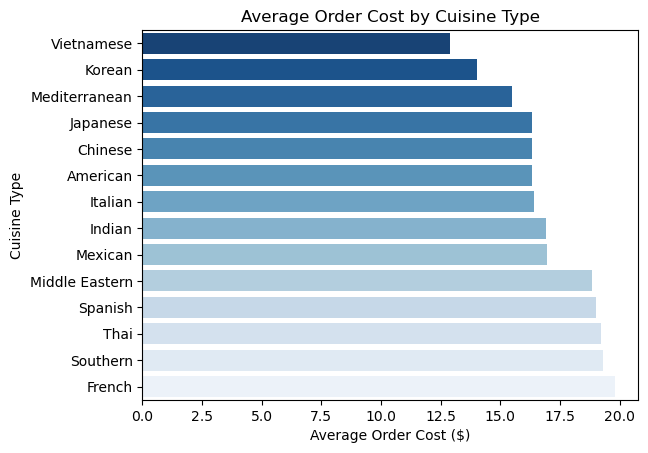

In [8]:
## Group by cuisine type and calculate the average order cost
avg_cost_by_cuisine = df.groupby("Cuisine Type")["Cost of the order"].mean().sort_values()

sns.barplot(
    x=avg_cost_by_cuisine.values, 
    y=avg_cost_by_cuisine.index, 
    hue=avg_cost_by_cuisine.index,
    palette="Blues_r",  
    legend=False 
)

plt.xlabel("Average Order Cost ($)")
plt.ylabel("Cuisine Type")
plt.title("Average Order Cost by Cuisine Type")
plt.show()

## 2. Analysis of Cuisine Costs

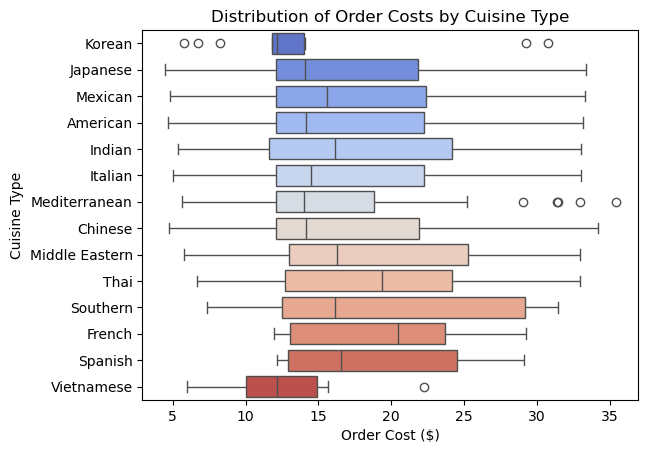

In [11]:
# To show the minimum, median, and maximum order costs per cuisine, highlighting outliers.
sns.boxplot(x="Cost of the order", y="Cuisine Type", hue="Cuisine Type", data=df, palette="coolwarm")
plt.xlabel("Order Cost ($)")
plt.ylabel("Cuisine Type")
plt.title("Distribution of Order Costs by Cuisine Type")
plt.show()

## 3. Density of Costs Per Cuisine

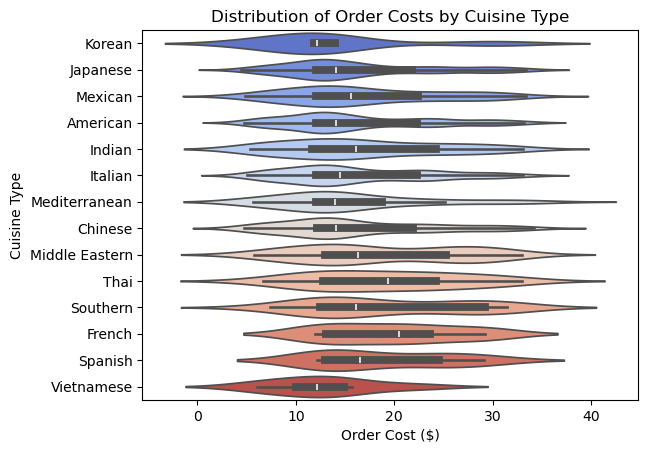

In [14]:
# To understand how concentrated or spread out the order costs are for different cuisines
sns.violinplot(x="Cost of the order", y="Cuisine Type", hue="Cuisine Type", data=df, palette="coolwarm")
plt.xlabel("Order Cost ($)")
plt.ylabel("Cuisine Type")
plt.title("Distribution of Order Costs by Cuisine Type")
plt.show()

## 4. Cost vs. Number of Orders Per Cuisine

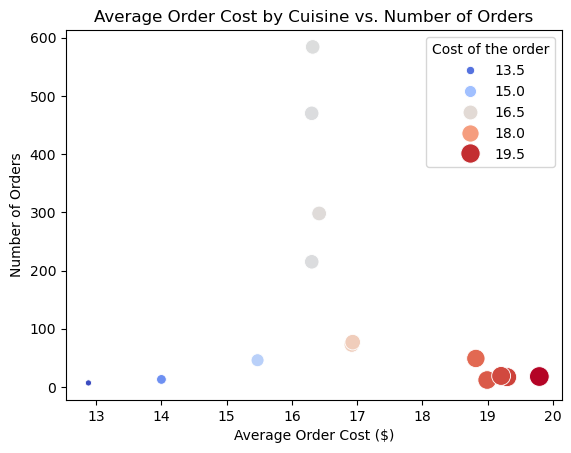

In [17]:
# To reveal whether expensive cuisines are also popular or if people prefer more affordable options
avg_orders = df.groupby("Cuisine Type").size() 
avg_costs = df.groupby("Cuisine Type")["Cost of the order"].mean()

sns.scatterplot(x=avg_costs, y=avg_orders, hue=avg_costs, palette="coolwarm", size=avg_costs, sizes=(20, 200))

plt.xlabel("Average Order Cost ($)")
plt.ylabel("Number of Orders")
plt.title("Average Order Cost by Cuisine vs. Number of Orders")
plt.show()

## 5. Correlation Between Cost, Delivery Time, and Ratings

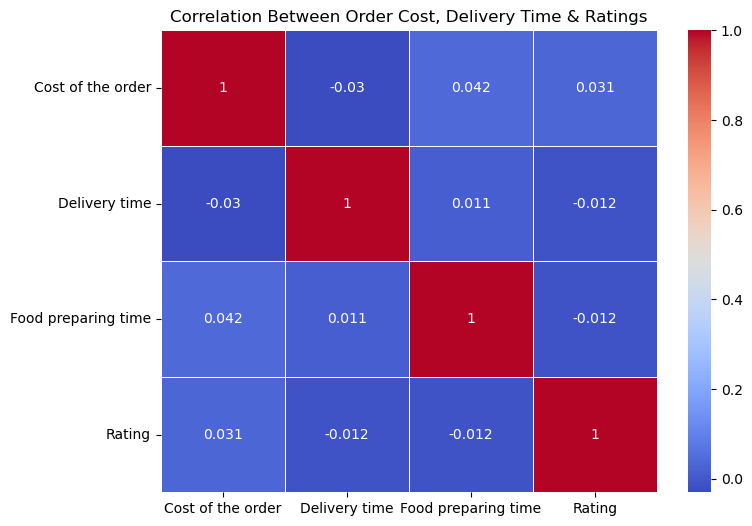

In [20]:
# To check if higher-cost orders take longer to deliver or if higher-cost orders get better ratings
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Cost of the order', 'Delivery time', 'Food preparing time', 'Rating']].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Order Cost, Delivery Time & Ratings")
plt.show()

## 6. Top 10 Restaurants by Order Count

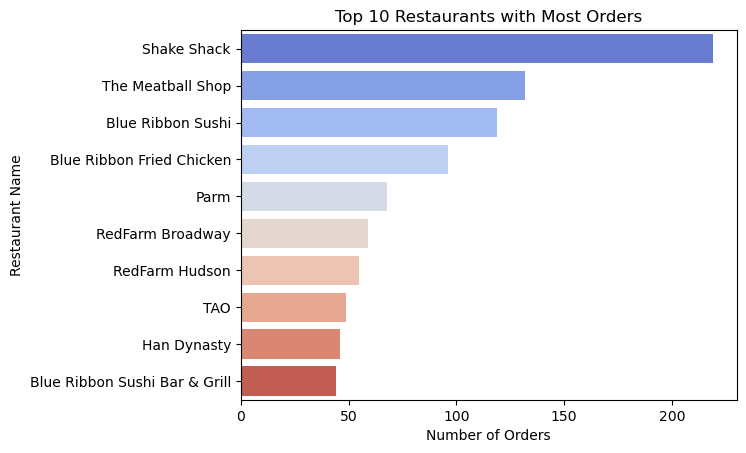

In [23]:
top_restaurants = df['Restaurant Name'].value_counts().head(10)

sns.barplot(x=top_restaurants.values, y=top_restaurants.index,hue= top_restaurants.index, palette="coolwarm")
plt.xlabel("Number of Orders")
plt.ylabel("Restaurant Name")
plt.title("Top 10 Restaurants with Most Orders")
plt.show()